Import Packages

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [5]:
#gdp_df.head(10)

In [6]:
type(gdp_df)

pandas.core.frame.DataFrame

In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [9]:
gdp_df.shape

(7662, 4)

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [11]:
gdp_df[0:3]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN


In [12]:
gdp_df.loc[0] # first data/row

Country or Area    Afghanistan
Year                      2021
Value              1517.016266
Value Footnotes            NaN
Name: 0, dtype: object

In [13]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [15]:
gdp_df=gdp_df.drop(columns = ['Value Footnotes'])

In [16]:
#gdp_df.drop('Value Footnotes', axis= 'columns')

In [17]:
#gdp_df=gdp_df.drop(columns = ['Value Footnotes'], inplace=True) #save new df as original name

In [18]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [19]:
gdp_df=gdp_df.rename(columns={'Country or Area':'Country', 'Value':'Gdp_Per_Capita'})

In [20]:
# gdp_df.colums= ['Country', 'Year', 'Gdp_Per_Capita'] # need to provide every column name

In [21]:
print(gdp_df)

          Country  Year  Gdp_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [23]:
gdp_df['Year'].nunique() #gdp_df['Year'].sort_values(assending=False).unique().tolist() #sort and display unique year

33

In [24]:
countries=gdp_df.groupby('Country')['Year'].count() #gdp_df['Country'].value_counts()  # unique occourance of country

In [25]:
countries=countries.reset_index()

In [26]:
countries=countries.rename(columns={'Year':'Count of Year'})
                           

In [27]:
pd.set_option('display.max_rows', None)

In [28]:
#countries['Count of Year']==33

In [29]:
countries[countries['Count of Year']==33]['Country'].count()

202

In [30]:
countries[countries['Count of Year']<33]['Country'].count()

40

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [32]:
gdp_2020=gdp_df[gdp_df['Year']==2020]

<Axes: ylabel='Frequency'>

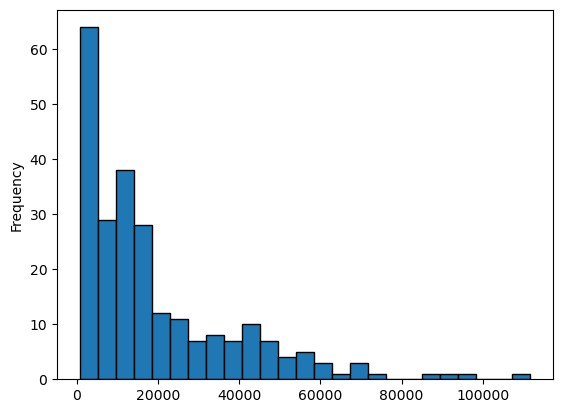

In [33]:
#histogram
gdp_2020['Gdp_Per_Capita'].plot(kind='hist', edgecolor='black', bins=25)

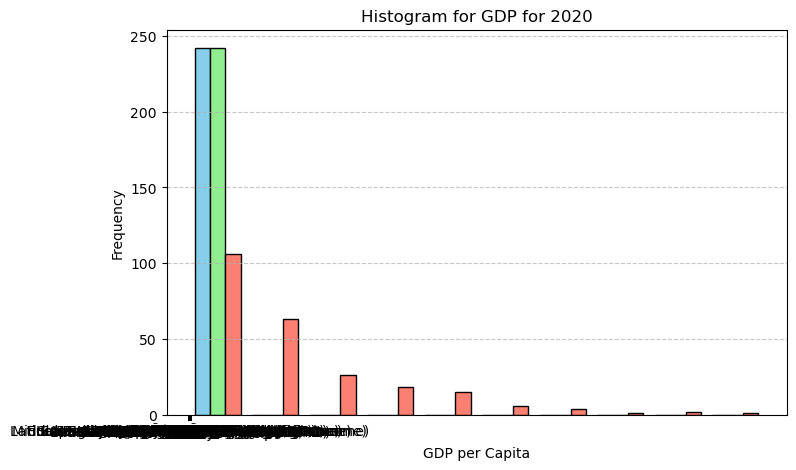

In [34]:
plt.figure(figsize=(8, 5))
plt.hist(gdp_2020, color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title("Histogram for GDP for 2020")
plt.xlabel("GDP per Capita")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Gdp_Per_Capita', ylabel='Density'>

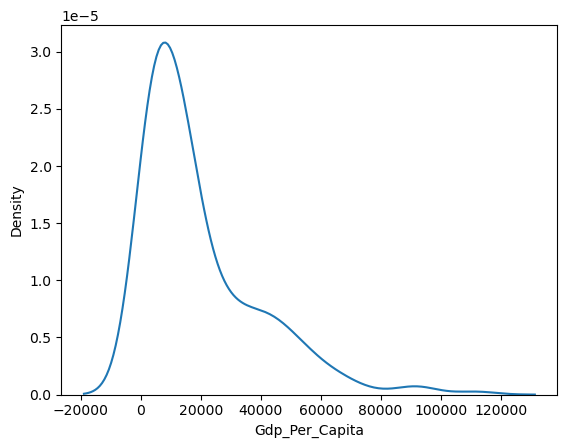

In [35]:
#density plot
sns.kdeplot(data=gdp_2020, x='Gdp_Per_Capita')

<Axes: xlabel='Gdp_Per_Capita'>

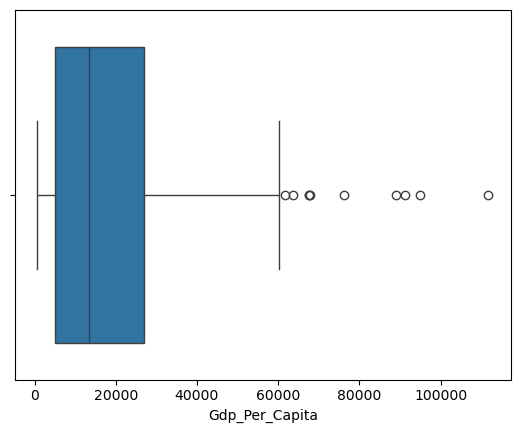

In [36]:
#BoxPlot
sns.boxplot(data=gdp_2020, x='Gdp_Per_Capita')

<Axes: xlabel='Gdp_Per_Capita'>

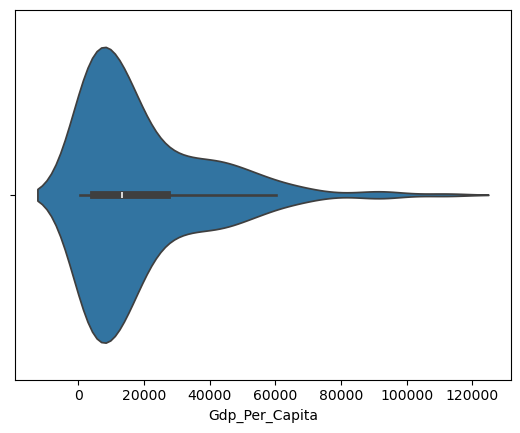

In [37]:
#violinplot
sns.violinplot(data=gdp_2020, x='Gdp_Per_Capita')

<Axes: xlabel='Gdp_Per_Capita'>

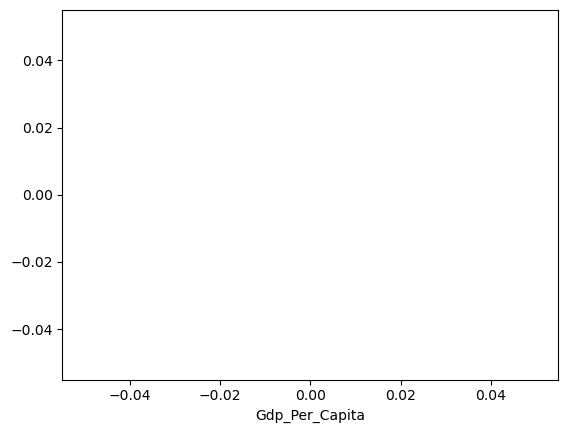

In [38]:
#ScatterPlot
sns.scatterplot(data=gdp_2020, x='Gdp_Per_Capita')

<Axes: xlabel='Year', ylabel='Gdp_Per_Capita'>

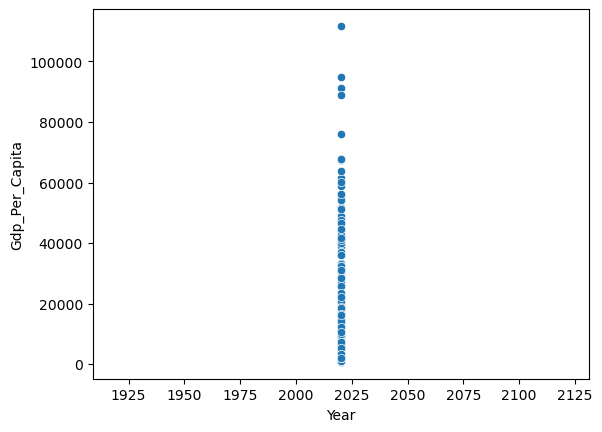

In [39]:
sns.scatterplot(data=gdp_2020, x='Year', y='Gdp_Per_Capita')

In [40]:
#from Renuka
# sns.displot(data=gdp_2020['GDP_Per_Capita'],kde=True)
# #Create a density plot using matplotlib
# gdp_2020.GDP_Per_Capita.plot.density(color='green')
# plt.title('Denisty plot for GDP per capita using matplotlib')
# plt.show()
# #Create a density plot using seaborn
# sns.kdeplot(data = gdp_2020, x= 'GDP_Per_Capita', fill = 'skyblue')
# plt.xlabel('GDP Per Capita')
# plt.title('Density plot for GDP per capita using seaborn')
# plt.show()
# # Boxplot using Pandas
# gdp_2020.boxplot(column =['GDP_Per_Capita'], grid = False)
# #plt.xlabel('GDP Per Capita')
# plt.title('Boxplot for GDP per capita')
# plt.show()
# # Boxplot using Seaborn
# sns.boxplot(data =gdp_2020, x='GDP_Per_Capita')
# plt.xlabel('GDP Per Capita')
# plt.title('Boxplot for GDP per capita using Seaborn')
# plt.show()

<Axes: xlabel='Year', ylabel='Gdp_Per_Capita'>

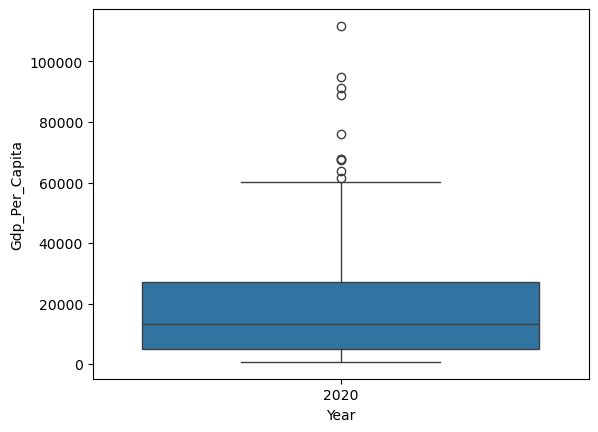

In [41]:
sns.boxplot(data=gdp_2020, x='Year', y='Gdp_Per_Capita')

### 9. What was the median GDP per capita value in 2020?

In [43]:
gdp_2020['Gdp_Per_Capita'].median()

13357.997573370474

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [45]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [46]:
gdp_decades

,Country,Year,Gdp_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
52,Africa Eastern and Southern,1990,3037.297466
55,Africa Western and Central,2020,3957.933804
65,Africa Western and Central,2010,3737.506710
75,Africa Western and Central,2000,2671.599188
85,Africa Western and Central,1990,2788.301039


<Axes: xlabel='Year', ylabel='Gdp_Per_Capita'>

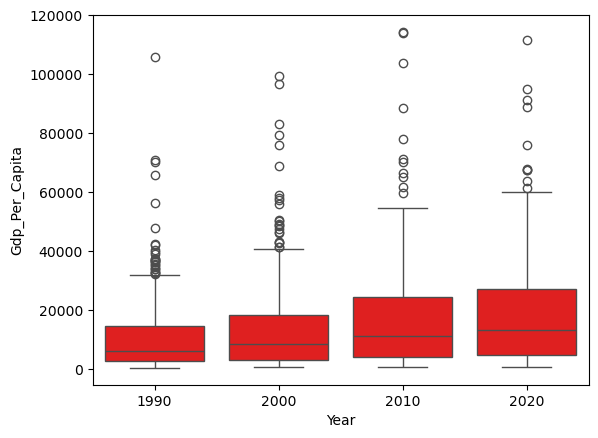

In [47]:
#box plot
sns.boxplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita', color='red')

<Axes: xlabel='Year', ylabel='Gdp_Per_Capita'>

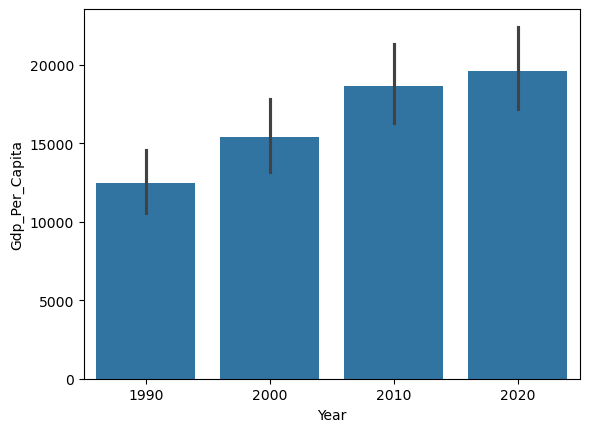

In [48]:
sns.barplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita')

<Axes: xlabel='Year', ylabel='Gdp_Per_Capita'>

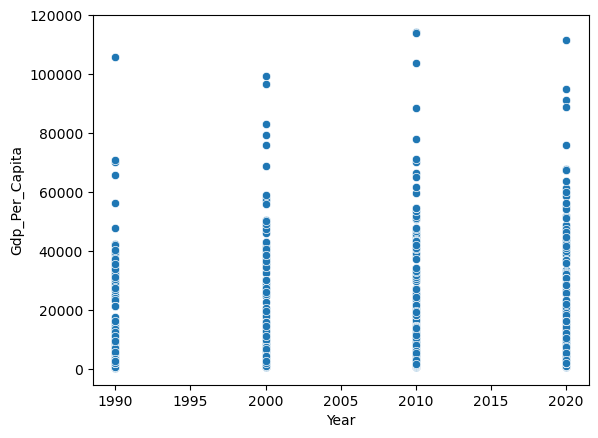

In [49]:
sns.scatterplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita')

<Axes: xlabel='Year', ylabel='Gdp_Per_Capita'>

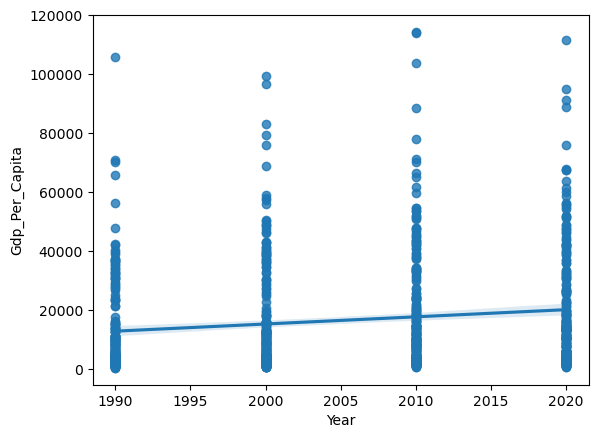

In [50]:

sns.regplot(data=gdp_decades, x='Year', y='Gdp_Per_Capita')

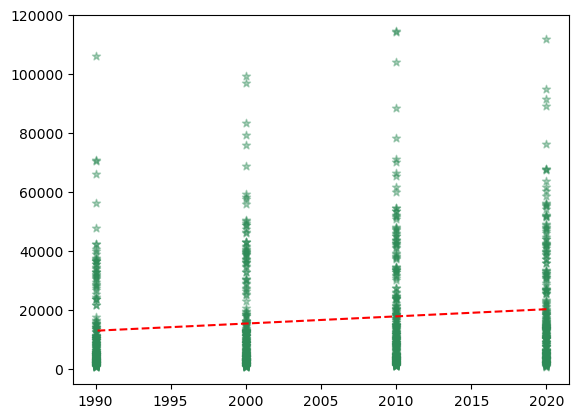

In [51]:
#Q10d. Answer: * A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

# Create a scatterplot using plt.scatter(x, y).
plt.scatter(gdp_decades.Year, gdp_decades.Gdp_Per_Capita, color = 'seagreen', marker ='*', alpha = 0.4)

# function np.polyfit in NumPy is used to fit a polynomial of a specified degree to a set of data points using the least squares method
# Calculate the equation for the trendline using numpy.polyfi.
trend = np.polyfit(gdp_decades.Year,gdp_decades.Gdp_Per_Capita ,1)

# pass trend parameter in To create a polynomial, you can pass an array of coefficients to numpy.poly1d
trend_var = np.poly1d(trend)

# Add the trendline to the plot using plt.plot(x, p(x))
plt.plot(gdp_decades.Year, trend_var(gdp_decades.Year),"r--")

# show the graph
plt.show()

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [53]:
gdp_df[gdp_df['Gdp_Per_Capita']>100000].sort_values('Year')

,Country,Year,Gdp_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [55]:
gdp_df[gdp_df['Year']==2020].nlargest(1,'Gdp_Per_Capita')#['Country'] #can use serting descing and head()

,Country,Year,Gdp_Per_Capita
4148,Luxembourg,2020,111751.314751


In [56]:
top_country=gdp_df[gdp_df['Country']=='Luxembourg']

<Axes: xlabel='Year'>

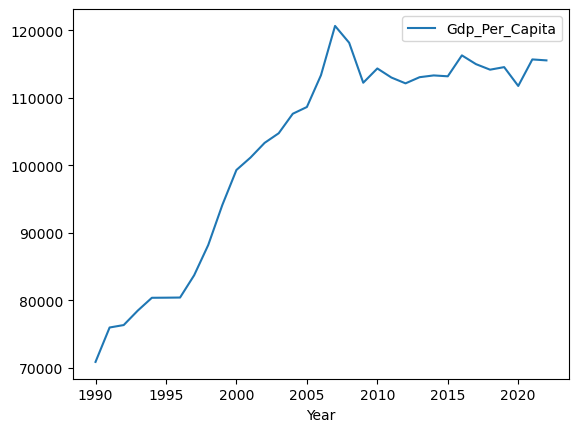

In [57]:
top_country.plot(x='Year',y='Gdp_Per_Capita', kind='line')

### 13 Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [59]:
gdp_df[gdp_df['Year']==2020].nsmallest(1,'Gdp_Per_Capita')#['Country']

,Country,Year,Gdp_Per_Capita
973,Burundi,2020,711.355263


In [60]:
small_country=gdp_df[gdp_df['Country']=='Burundi']

<Axes: xlabel='Year'>

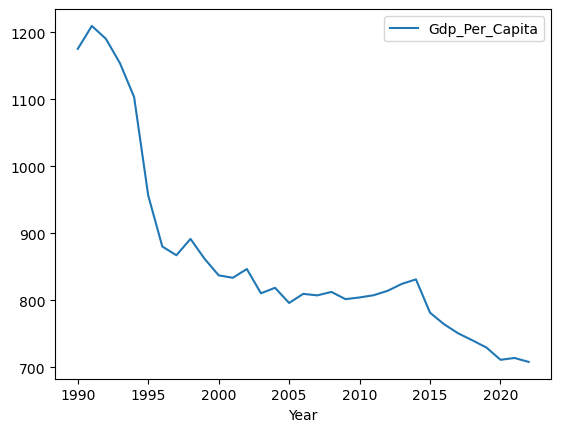

In [61]:
small_country.plot(x='Year', y='Gdp_Per_Capita', kind='line')

### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [63]:
int_df=pd.read_csv('../data/internet_use.csv',nrows=6083, usecols=[0, 1, 2, 3])

### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [65]:
int_df=int_df.drop(columns = ['Value Footnotes'])

In [66]:
int_df=int_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

In [67]:
#int_df

### 16. Look at the number of observations in this dataset per year. What do you notice?

In [69]:
int_df.groupby('Year')['Year'].count()

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: Year, dtype: int64

### 17. What is the first year to have a non-zero internet users percentage value?

In [94]:
int_df[int_df['Internet_Users_Pct']>0].sort_values('Year')
int_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [86]:
int_df[int_df['Year'].isin([2000, 2014])]
int_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [75]:
count_df=int_df[(int_df['Year']==2014) & (int_df['Internet_Users_Pct']<5)].count()

In [76]:
count_df

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [98]:
#gdp_df=gdp_df.replace("Russia","Russian Federation", inplace = True) #replace country nanme with same name
gdp_and_internet_use = pd.merge(gdp_df, int_df, how='outer') #, on=['Country', 'Year']
#gdp_and_internet_use

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (387317408.py, line 2)

### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [ ]:
#int_df.head()

In [ ]:
int_df[int_df['Year'].isin([2014])].sort_values('Internet_Users_Pct', ascending=False).head(5)

In [ ]:
#gdp_df.head()
gdpn_df=gdp_df[gdp_df['Country'].isin(['Iceland', 'Falkland (Malvinas) Islands', 'Bermuda'])]

In [ ]:
#sns.lineplot(data=gdpn_df, x='Year', y='Gdp_Per_Capita')
g = sns.FacetGrid(gdpn_df, col='Country', col_wrap=3, height=4, sharey=True)
g.map(sns.lineplot, 'Year', 'Gdp_Per_Capita', marker='s')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "GDP per Capita")
g.fig.suptitle("GDP per Capita Over Time by Country", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [ ]:
gdp_and_internet_use_2014= gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2014])]

In [ ]:
#gdp_and_internet_use_2014

### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_and_internet_use_2014, x='Gdp_Per_Capita', y='Internet_Users_Pct',  style='Country', s=100)

# Customize the plot
plt.title('Internet Users Percentage vs GDP per Capita (2014)', fontsize=16)
plt.xlabel('GDP per Capita (USD)', fontsize=14)
plt.ylabel('Internet Users Percentage (%)', fontsize=14)
plt.legend(title='Country', fontsize=10, title_fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.6)
#plt.tight_layout()

### 24. Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [84]:
gdp_per_capita_2014=gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

NameError: name 'gdp_and_internet_use' is not defined

In [ ]:
gdp_per_capita_2014['GDP_group'] = pd.qcut(
    gdp_per_capita_2014['Gdp_Per_Capita'], 
    q=3, 
    labels=['Low', 'Medium', 'High']
)

In [ ]:
print(gdp_per_capita_2014.tail())

### 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [ ]:
gdp_per_capita_2014.groupby('GDP_group')['Internet_Users_Pct'].median()